In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data/spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [4]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [5]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df['Message'],df['spam'],test_size=0.2)

In [7]:
X_train.shape

(4457,)

In [8]:
y_train.value_counts()

spam
0    3849
1     608
Name: count, dtype: int64

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_v = v.fit_transform(X_train)

In [10]:
X_train_v

<4457x7778 sparse matrix of type '<class 'numpy.int64'>'
	with 59405 stored elements in Compressed Sparse Row format>

In [11]:
X_train_v.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
X_train_v.shape

(4457, 7778)

In [13]:
X_train_v.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
v.get_feature_names_out()

array(['00', '000', '008704050406', ..., 'zouk', 'zyada', 'ú1'],
      dtype=object)

In [15]:
dir(v)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_validate_data',
 '_validate_ngram_range',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',

In [16]:
v.vocabulary_

{'somewhere': 6340,
 'out': 5028,
 'there': 6866,
 'beneath': 1332,
 'the': 6849,
 'pale': 5078,
 'moon': 4602,
 'light': 4132,
 'someone': 6330,
 'think': 6879,
 'in': 3656,
 'of': 4911,
 'some': 6326,
 'where': 7514,
 'dreams': 2455,
 'come': 1911,
 'true': 7084,
 'goodnite': 3193,
 'amp': 958,
 'sweet': 6684,
 'im': 3627,
 'gonna': 3184,
 'miss': 4532,
 'so': 6313,
 'much': 4651,
 'wat': 7427,
 'makes': 4347,
 'people': 5171,
 'dearer': 2201,
 'is': 3764,
 'not': 4842,
 'just': 3896,
 'de': 2193,
 'happiness': 3344,
 'dat': 2176,
 'feel': 2809,
 'when': 7511,
 'meet': 4447,
 'them': 6858,
 'but': 1588,
 'pain': 5073,
 'dem': 2248,
 'late': 4047,
 'tellmiss': 6789,
 'on': 4954,
 'my': 4675,
 'way': 7442,
 'don': 2412,
 'know': 3982,
 'he': 3377,
 'watching': 7432,
 'film': 2850,
 'computer': 1943,
 'wnt': 7597,
 'to': 6967,
 'buy': 1593,
 'bmw': 1422,
 'car': 1662,
 'urgently': 7237,
 'its': 3783,
 'vry': 7361,
 'urgent': 7236,
 'hv': 3578,
 'shortage': 6147,
 'lt': 4269,
 'gt': 3268

In [19]:
v.get_feature_names_out()[6340]

'somewhere'

In [20]:
X_train_np = X_train_v.toarray()

In [22]:
X_train_np[:4]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
np.where(X_train_np[0]!=0)

(array([ 958, 1332, 1911, 2455, 3193, 3656, 4132, 4602, 4911, 5028, 5078,
        6326, 6330, 6340, 6684, 6849, 6866, 6879, 7084, 7514], dtype=int64),)

In [18]:
from sklearn.naive_bayes import MultinomialNB


In [27]:
X_train[:4][4004]

'somewhere out there beneath the pale moon light someone think in of u some where out there where dreams come true... goodnite &amp; sweet dreams'

In [28]:
X_train_np[0][958]

1

In [29]:
v.get_feature_names_out()[958]

'amp'

In [30]:
X_train_np[0][1332]

1

In [31]:
v.get_feature_names_out()[1332]

'beneath'

In [32]:
v.get_feature_names_out()[1911]

'come'

In [33]:
model = MultinomialNB()
model.fit(X_train_v,y_train)

MultinomialNB()

In [34]:
X_test_cv= v.transform(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

y_pred=model.predict(X_test_cv)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       976
           1       0.98      0.89      0.94       139

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [36]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

emails_count=v.transform(emails)

model.predict(emails_count)

array([0, 1], dtype=int64)

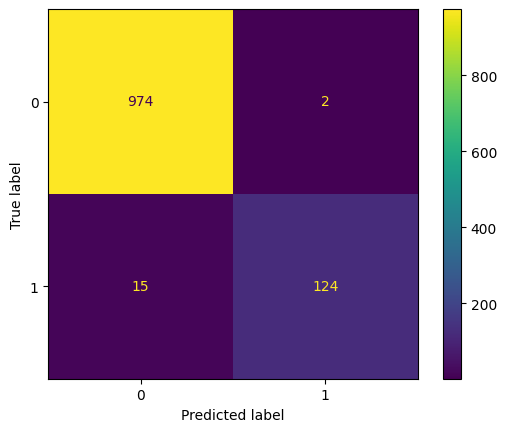

In [42]:
import matplotlib
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [43]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('Vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [44]:
clf.fit(X_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [45]:
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       976
           1       0.98      0.89      0.94       139

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



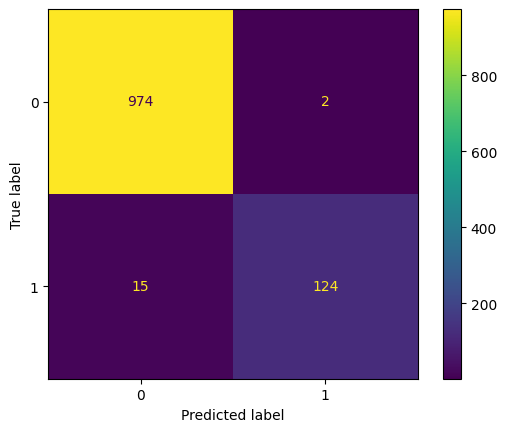

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)